In [ ]:
import pandas as pd
import multiprocessing
import numpy as np
from collections import defaultdict
from tqdm import trange
import re


df = pd.read_csv('/content/data2.csv',engine='python',encoding='utf-8')
df

,index,text
0,0,having an ama toshi do not miss this one team ...
1,1,chatgpt passes mba exam given by a wharton pro...
2,2,chatgpt is trending on twitter past few weeks ...
3,3,chatgpt passing medical and bar exams tells yo...
4,4,let s have chat gpt do an end of life conversa...
...,...,...
795,795,maybe the trudeau govt should consult chatgpt ...
796,796,just copy and paste a chatgpt response into a ...
797,797,chat gpt says it s cooperative multitasking
798,798,chatgpt s opinion on do you think its wrong fo...


In [ ]:
del df['index']
df

,text
0,having an ama toshi do not miss this one team ...
1,chatgpt passes mba exam given by a wharton pro...
2,chatgpt is trending on twitter past few weeks ...
3,chatgpt passing medical and bar exams tells yo...
4,let s have chat gpt do an end of life conversa...
...,...
795,maybe the trudeau govt should consult chatgpt ...
796,just copy and paste a chatgpt response into a ...
797,chat gpt says it s cooperative multitasking
798,chatgpt s opinion on do you think its wrong fo...


In [ ]:
# Basic Cleaning Text Function
def Twitter_use_only(readData, Num=False, Eng=False):
    list_text = []

    for i in trange(len(df['text'])):

        pre_text = df['text'][i]
           # Retweets 제거
        text = re.sub('RT @[\w_]+: ', '', pre_text)

          # enticons 제거
        text = re.sub('@[\w_]+', '', text)

          # URL 제거
        text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ',
                      text)  # http로 시작되는 url
        text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ',
                      text)  # http로 시작되지 않는 url
            #     pattern = '(http|ftp|https)://(?:[-\w.]|(?:\da-fa-F]{2}))+'
            #     text = re.sub(pattern = pattern, repl = ' ',string=text)

          # Hashtag 제거
        text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

          # 쓰레기 단어 제거
        text = re.sub('[&]+[a-z]+', ' ', text)

          # 특수문자 제거
        text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)

          # 띄어쓰기 제거
        text = text.replace('\n', ' ')

        text = re.sub(r'can t', 'can not', text)

        text = re.sub(r'don t', 'do not', text)

          # 정리
        text = ' '.join(text.split())
        list_text.append(text)

    return list_text

In [ ]:
text = Twitter_use_only(df)
text

100%|██████████| 800/800 [00:00<00:00, 23256.31it/s]


['having an ama toshi do not miss this one team building constantly and i know this will go some decent rounds and could make a change in the space 4pm utc and their tools are just some of the topics',
 'chatgpt passes mba exam given by a wharton professor',
 'chatgpt is trending on twitter past few weeks here are 5 insightful threads about chatgpt you need to know',
 'chatgpt passing medical and bar exams tells you more about exams than about ai',
 'let s have chat gpt do an end of life conversation with a patient and their family then i ll be worried',
 'i asked chatgpt if scott was pro vax',
 'chatgpt in 3 years',
 'if you re using chatgpt or similar instead of google your searches have very little alpha',
 'do you use',
 'this is what alexa should have been',
 'can chatgpt create good course outlines',
 'seems to work pretty well at giving you good recipe suggestions',
 'in long run chatgpt actually helps google google was vulnerable to a lean scrappy search engine that just cut ou

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
text = Twitter_use_only(df)

stop_words = set(stopwords.words('english'))
tokenizer = TreebankWordTokenizer()

100%|██████████| 800/800 [00:00<00:00, 30971.99it/s]


In [ ]:
result_tokens = []

for i in text:
    word_tokens = i
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(i)
    result = []

    for w in word_tokens:
        if w not in stop_words:
            result.append(w)
    result = ' '.join(result)

    result_tokens.append(result)

result_tokens

['ama toshi miss one team building constantly know go decent rounds could make change space 4pm utc tools topics',
 'chatgpt passes mba exam given wharton professor',
 'chatgpt trending twitter past weeks 5 insightful threads chatgpt need know',
 'chatgpt passing medical bar exams tells exams ai',
 'let chat gpt end life conversation patient family worried',
 'asked chatgpt scott pro vax',
 'chatgpt 3 years',
 'using chatgpt similar instead google searches little alpha',
 'use',
 'alexa',
 'chatgpt create good course outlines',
 'seems work pretty well giving good recipe suggestions',
 'long run chatgpt actually helps google google vulnerable lean scrappy search engine cut spam tracking excessive ads e duckduckgo brave search integrating chatgpt creating next gen search engines expensive domain goog msft',
 'ask chatgpt',
 'talked golf viral chatbot chatgpt results blew mind',
 'lol chatgpt run company',
 'fascinating conversation chatgpt leading questions future governance emerging in

In [ ]:
emo_df = pd.DataFrame({'text' : result_tokens})
emo_df['emotion'] = 0
emo_df
emo_df.to_csv('data1.csv',encoding='utf-8')

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

n_score = 0
p_score = 0
ne_score = 0

for idx, i in enumerate(result_tokens):
  score = sia.polarity_scores(i)
  print(i)
  print(score)
  if score['compound'] >= 0.1:
          sentiment = '긍정'
          emo_df['emotion'][idx] = 1
          p_score+=1
  elif score['compound'] <= -0.1:
          sentiment = '부정'
          emo_df['emotion'][idx] = 0
          n_score+=1
  else:
          sentiment = '중립'
          emo_df['emotion'][idx] = 0
          ne_score+=1


print("긍정 문장 개수 : {}".format(p_score))
print("부정 문장 개수 : {}".format(n_score))
print("중립 문장 개수 : {}".format(ne_score))

ama toshi miss one team building constantly know go decent rounds could make change space 4pm utc tools topics
{'neg': 0.082, 'neu': 0.918, 'pos': 0.0, 'compound': -0.1531}
chatgpt passes mba exam given wharton professor
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
chatgpt trending twitter past weeks 5 insightful threads chatgpt need know
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
chatgpt passing medical bar exams tells exams ai
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
let chat gpt end life conversation patient family worried
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}
asked chatgpt scott pro vax
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
chatgpt 3 years
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
using chatgpt similar instead google searches little alpha
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
use
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
alexa
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

<ipython-input-17-38a15239c2b0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emo_df['emotion'][idx] = 0
<ipython-input-17-38a15239c2b0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emo_df['emotion'][idx] = 0
<ipython-input-17-38a15239c2b0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emo_df['emotion'][idx] = 1



maybe give chatgpt try write h p copd exacerbation admission
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lol btw chatgpt french version talk french behave like describe
{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.6486}
chatgpt whatever called kiss mf n grits
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}
try putting chatgpt help understand
{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}
thank god docent sermon central chatgpt sermon centered assemblies biblical always corrupt may shortcut services highlight sleeping bride trap cage full birds come
{'neg': 0.081, 'neu': 0.671, 'pos': 0.247, 'compound': 0.5719}
koreai updates make easier build low code chatbots chatgpt large language model via
{'neg': 0.132, 'neu': 0.692, 'pos': 0.176, 'compound': 0.1779}
based stolen ai work product
{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.4939}
chatgpt smarter mba ive ever met comment absurdly dense like saying car beat horse change train 

In [ ]:
emo_df

,text,emotion
0,ama toshi miss one team building constantly kn...,0
1,chatgpt passes mba exam given wharton professor,0
2,chatgpt trending twitter past weeks 5 insightf...,0
3,chatgpt passing medical bar exams tells exams ai,0
4,let chat gpt end life conversation patient fam...,0
...,...,...
795,maybe trudeau govt consult chatgpt advice lot ...,0
796,copy paste chatgpt response different ai langu...,0
797,chat gpt says cooperative multitasking,0
798,chatgpt opinion think wrong people keep asking...,0


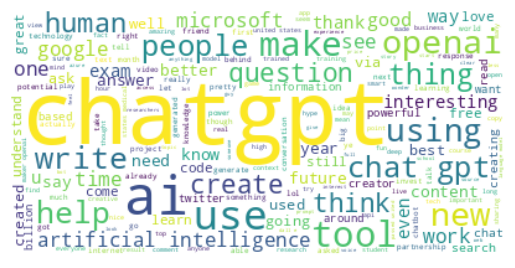

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


p_text = emo_df[emo_df['emotion']==1]

text_combined = ' '.join(p_text['text'].tolist())
wordcloud = WordCloud(background_color='white').generate(text_combined)

# 워드클라우드 출력
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

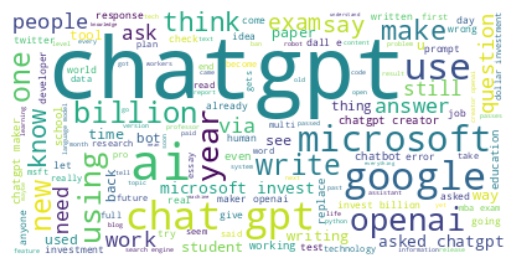

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


p_text = emo_df[emo_df['emotion']==0]

text_combined = ' '.join(p_text['text'].tolist())
wordcloud = WordCloud(background_color='white').generate(text_combined)

# 워드클라우드 출력
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# 문장과 라벨 분리
x = emo_df["text"]
y = emo_df["emotion"]

# train, test 데이터셋 분리
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#train : test = 8:2

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

# 분류 모델 학습
model = LinearSVC()
model.fit(X_train, y_train)

# 테스트 데이터셋 예측
y_pred = model.predict(X_test)

# 분류 결과 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        85
           1       0.79      0.67      0.72        75

    accuracy                           0.76       160
   macro avg       0.77      0.76      0.76       160
weighted avg       0.77      0.76      0.76       160



In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: emotion, Length: 800, dtype: int64


In [ ]:
cv = TfidfVectorizer(max_features=1500)
cv.fit(x)
print('Vocabulary: ')
print(cv.vocabulary_)

Vocabulary: 
{'miss': 757, 'one': 816, 'team': 1324, 'building': 196, 'constantly': 270, 'know': 655, 'go': 517, 'rounds': 1168, 'could': 286, 'make': 721, 'change': 220, 'space': 1262, 'tools': 1362, 'topics': 1365, 'chatgpt': 228, 'passes': 844, 'mba': 738, 'exam': 416, 'given': 513, 'wharton': 1450, 'professor': 1000, 'trending': 1374, 'twitter': 1387, 'past': 846, 'weeks': 1445, 'insightful': 612, 'threads': 1348, 'need': 791, 'passing': 845, 'medical': 741, 'bar': 157, 'exams': 419, 'ai': 41, 'let': 679, 'chat': 226, 'gpt': 525, 'end': 388, 'life': 689, 'conversation': 278, 'patient': 848, 'family': 443, 'worried': 1475, 'asked': 108, 'pro': 982, 'years': 1490, 'using': 1411, 'similar': 1238, 'google': 523, 'little': 699, 'alpha': 50, 'use': 1406, 'alexa': 44, 'create': 292, 'good': 521, 'course': 288, 'outlines': 825, 'seems': 1213, 'work': 1469, 'pretty': 970, 'well': 1448, 'giving': 515, 'recipe': 1062, 'long': 706, 'run': 1177, 'actually': 29, 'helps': 553, 'search': 1207, 'en

In [ ]:
import sys
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
clf = SVC(C=10, kernel='linear', random_state=100) # SVC 클래스 생성
clf.fit(X, y) ## 모형 학습

## 파라미터 추정치
print('가중치 :', clf.coef_) # 가중치는 kernel = 'linear'인 경우만 존재

가중치 :   (0, 2874)	0.0822990879508975
  (0, 2819)	1.0439681992504493
  (0, 426)	0.4758914335906621
  (0, 2029)	0.7274370631343496
  (0, 766)	0.7274370631343496
  (0, 2792)	0.43386762623315817
  (0, 2515)	0.43386762623315817
  (0, 1945)	0.8677352524663163
  (0, 1505)	0.43386762623315817
  (0, 983)	0.43386762623315817
  (0, 943)	0.43386762623315817
  (0, 879)	0.43386762623315817
  (0, 2637)	0.01794346546795667
  (0, 1853)	0.03588693093591334
  (0, 990)	0.01794346546795667
  (0, 648)	0.01794346546795667
  (0, 3084)	1.0450272867733421
  (0, 2664)	1.0450272867733421
  (0, 2847)	0.019165317727357824
  (0, 1638)	0.019165317727357824
  (0, 1421)	0.019165317727357824
  (0, 1338)	0.019165317727357824
  (0, 1325)	0.019165317727357824
  (0, 1277)	0.019165317727357824
  (0, 913)	0.019165317727357824
  :	:
  (0, 2104)	0.06377014949029824
  (0, 1842)	0.16821000218094595
  (0, 1042)	-0.8761840551433001
  (0, 528)	-1.9198483116103242
  (0, 327)	0.16730182911431435
  (0, 151)	-0.17250461047020083
  (0, 3

In [ ]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': y_pred})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


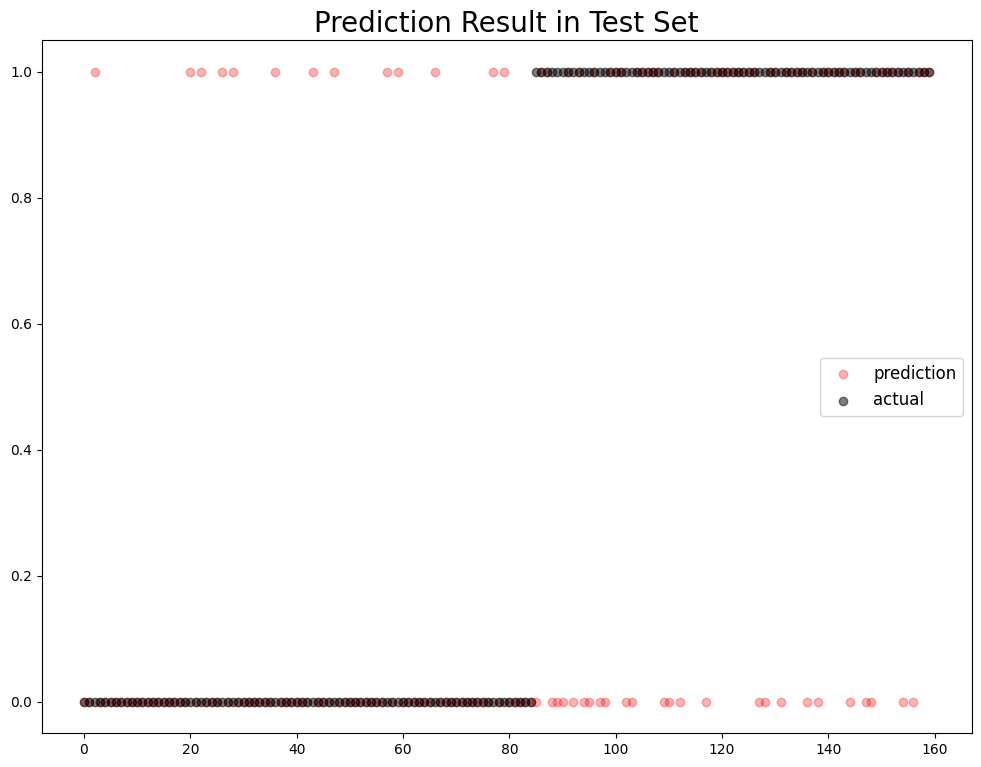

In [ ]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], alpha=0.3, marker='o', color='r')
plt.scatter(df.index, df['actual'], alpha=0.5, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()